In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

## Loading the Data
Let's start by loading the various datasets provided.

In [2]:
# Loading CSV files
df_batting = pd.read_csv('df_batting.csv')
df_bowling = pd.read_csv('df_bowling.csv')
df_match = pd.read_csv('df_match.csv')
df_players = pd.read_csv('df_batting.csv')

# Loading JSON files
with open('t20_wc_player_info.json') as f:
    t20_wc_player_info = json.load(f)

with open('t20_wc_bowling_summary.json') as f:
    t20_wc_bowling_summary = json.load(f)

with open('t20_wc_batting_summary.json') as f:
    t20_wc_batting_summary = json.load(f)

with open('t20_wc_match_results.json') as f:
    t20_wc_match_results = json.load(f)

## Data Overview
Let's take a quick look at the structure of each dataset.

In [3]:
# Displaying the first few rows of each DataFrame
df_players.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


In [4]:
df_bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823


In [5]:
df_match.head()

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [6]:
df_batting.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


## Exploratory Data Analysis (EDA)
Let's start with some basic exploratory data analysis to understand the distributions and relationships in the data.

In [7]:
# Checking for missing values
df_players.isnull().sum()

match          0
teamInnings    0
battingPos     0
batsmanName    0
runs           0
balls          0
4s             0
6s             0
SR             0
out/not_out    0
match_id       0
dtype: int64

In [8]:
df_bowling.isnull().sum()

match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
match_id       0
dtype: int64

In [9]:
df_match.isnull().sum()

team1        0
team2        0
winner       0
margin       4
ground       0
matchDate    0
match_id     0
dtype: int64

In [10]:
df_batting.isnull().sum()

match          0
teamInnings    0
battingPos     0
batsmanName    0
runs           0
balls          0
4s             0
6s             0
SR             0
out/not_out    0
match_id       0
dtype: int64

### Distribution of Runs in Batting Data

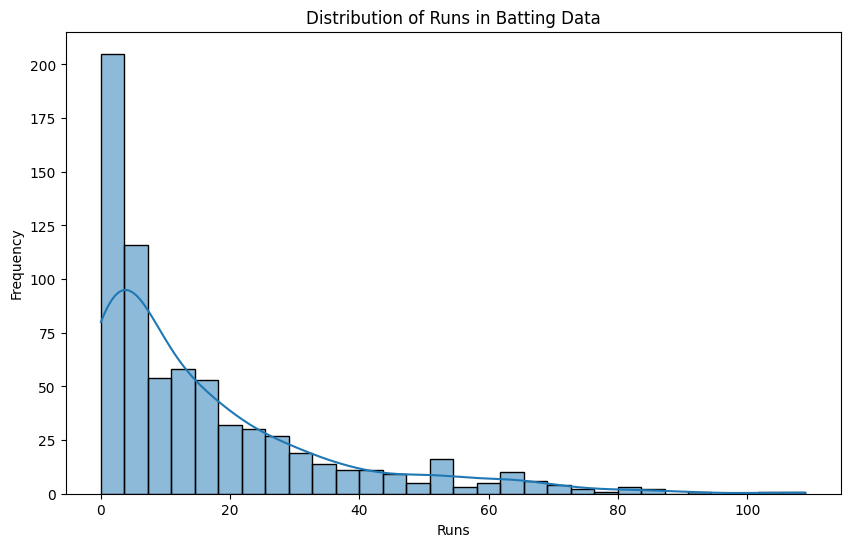

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_batting['runs'], bins=30, kde=True)
plt.title('Distribution of Runs in Batting Data')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

### Correlation Heatmap for Bowling Data
Let's see if there are any interesting correlations in the bowling data.

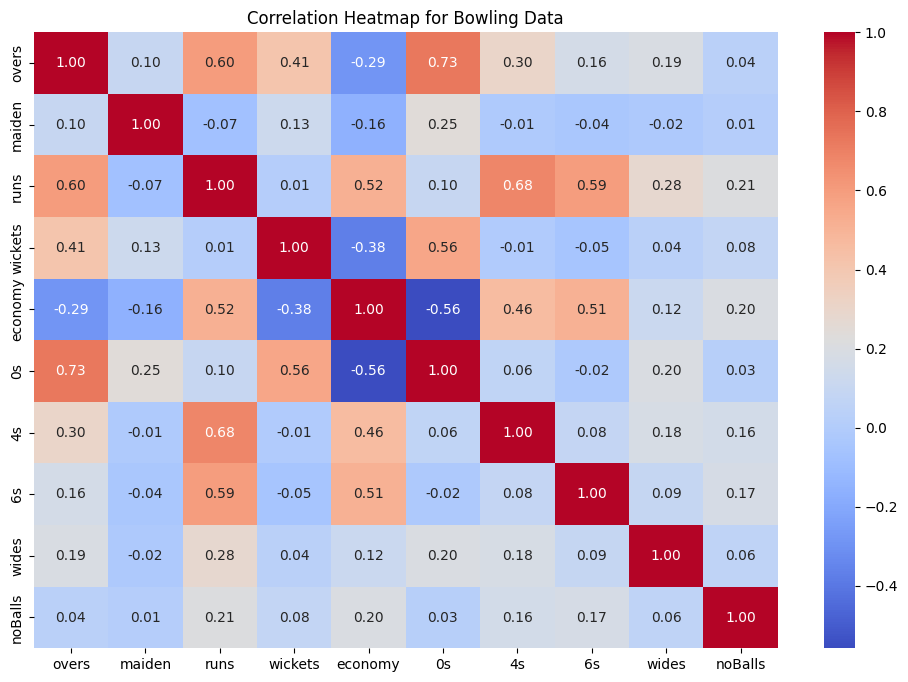

In [12]:
numeric_df = df_bowling.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Bowling Data')
plt.show()

PLAYER PERFORMANCE

1) Strike Rate vs. Batting Position: Using df_batting.csv, Find strike rate (SR) against batting position (battingPos) to analyze how players perform in different batting positions.


In [13]:
# Example 1: Merge batting and match data on match_id for analysis
df_batting_match = pd.merge(df_batting, df_match, on="match_id")
df_batting_match.sample(4)

#['Namibia' 'Netherlands' 'Scotland' 'Ireland' 'Sri Lanka' 'West Indies' 'Australia' 'Afghanistan' 'India' 'Bangladesh' 'South Africa' 'England' 'Pakistan' 'New Zealand' 'U.A.E.' 'Zimbabwe'] Teams in Dataset

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id,team1,team2,winner,margin,ground,matchDate
379,New Zealand Vs Sri Lanka,New Zealand,1,Finn Allen,1,3,0,0,33.33,out,T20I # 1850,New Zealand,Sri Lanka,New Zealand,65 runs,Sydney,"Oct 29, 2022"
210,New Zealand Vs Australia,Australia,4,Glenn Maxwell,28,20,3,1,140.00,out,T20I # 1839,Australia,New Zealand,New Zealand,89 runs,Sydney,"Oct 22, 2022"
104,Sri Lanka Vs U.A.E.,U.A.E.,5,Vriitya Aravindâ€,9,18,1,0,50.00,out,T20I # 1832,Sri Lanka,U.A.E.,Sri Lanka,79 runs,Geelong,"Oct 18, 2022"
488,England Vs New Zealand,England,4,Liam Livingstone,20,14,1,1,142.85,out,T20I # 1858,England,New Zealand,England,20 runs,Brisbane,"Nov 1, 2022"


Dropdown(description='Select Team:', options=('Namibia', 'Sri Lanka', 'U.A.E.', 'Netherlands', 'Scotland', 'We…

Dropdown(description='Select Player:', options=(), value=None)

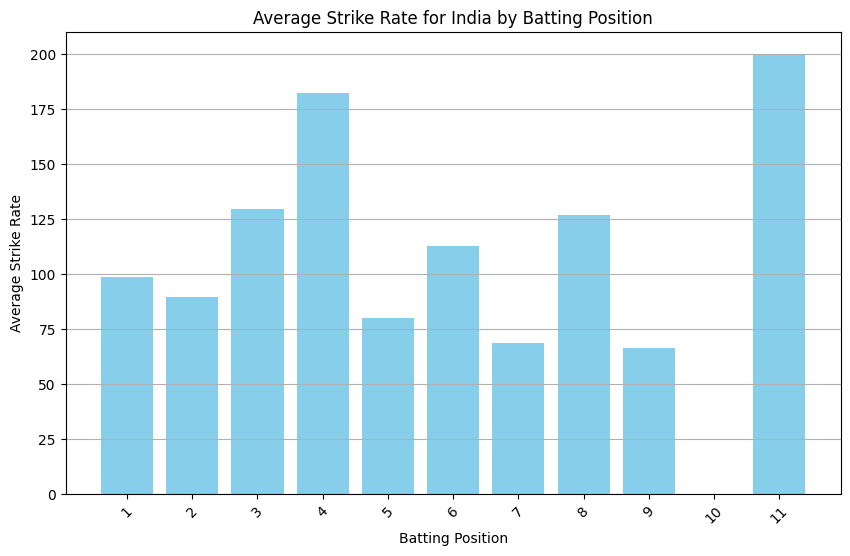


Strike rate for KL Rahul by batting position:


,battingPos,SR
259,1,50.00
345,1,75.00
434,1,64.28
519,1,156.25
644,1,145.71
673,1,100.00


In [14]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Convert the SR column to numeric, coercing errors to NaN
df_batting_match['SR'] = pd.to_numeric(df_batting_match['SR'], errors='coerce')

# Unique teams from the merged dataset
teams = df_batting_match['teamInnings'].unique()

# Dropdown to select team
team_dropdown = widgets.Dropdown(
    options=teams,
    description='Select Team:'
)

# Function to plot team strike rates by batting position
def plot_team_strike_rate(team_selected):
    team_data = df_batting_match[df_batting_match['teamInnings'] == team_selected]

    # Group by batting position and calculate mean strike rate, dropping NaN values
    avg_strike_rate_by_position = team_data.groupby('battingPos')['SR'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(avg_strike_rate_by_position['battingPos'].astype(str), avg_strike_rate_by_position['SR'], color='skyblue')
    plt.title(f'Average Strike Rate for {team_selected} by Batting Position')
    plt.xlabel('Batting Position')
    plt.ylabel('Average Strike Rate')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Function to update players based on selected team and plot
def update_players(change):
    team_selected = change['new']
    players = df_batting_match[df_batting_match['teamInnings'] == team_selected]['batsmanName'].unique()
    player_dropdown.options = players

    # Plot the average strike rate for the selected team
    plot_team_strike_rate(team_selected)

# Dropdown to select player (will be populated based on team selection)
player_dropdown = widgets.Dropdown(
    description='Select Player:'
)

# Display strike rate info when a player is selected
def display_strike_rate(player_name):
    player_data = df_batting_match[df_batting_match['batsmanName'] == player_name]
    print(f"\nStrike rate for {player_name} by batting position:")
    display(player_data[['battingPos', 'SR']])

# Button to show strike rate
def on_player_select(change):
    player_selected = change['new']
    display_strike_rate(player_selected)

# Attach functions to dropdowns
team_dropdown.observe(update_players, names='value')
player_dropdown.observe(on_player_select, names='value')

# Display widgets
display(team_dropdown, player_dropdown)


2) Runs vs. Balls Faced: For a specific batsman or a group of batsmen, plot runs scored (runs) against balls faced (balls) to examine scoring efficiency.

Dropdown(description='Select Batsman:', options=('Michael van Lingen', 'Divan la Cock', 'Jan Nicol Loftie-Eato…

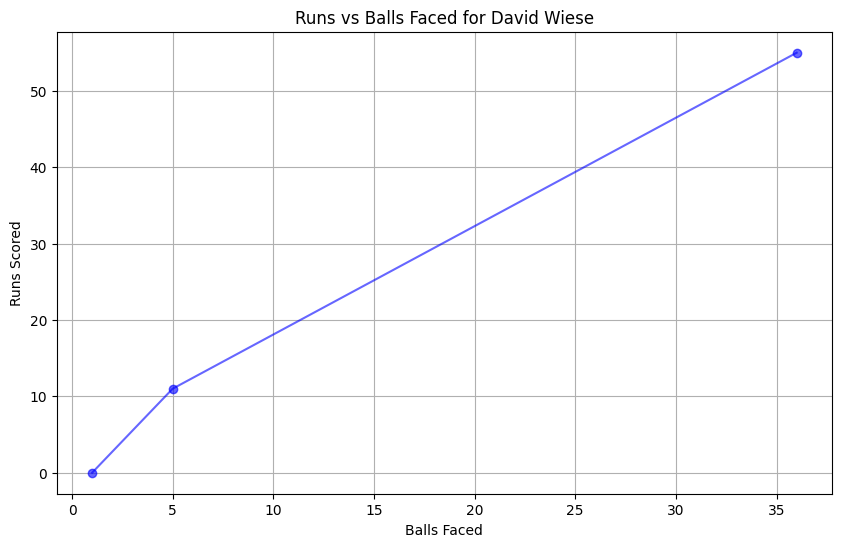

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the batting data
df_batting = pd.read_csv('df_batting.csv')

# Convert runs and balls columns to numeric if they are not
df_batting['runs'] = pd.to_numeric(df_batting['runs'], errors='coerce')
df_batting['balls'] = pd.to_numeric(df_batting['balls'], errors='coerce')

# Filter out rows with missing values in runs or balls
df_batting = df_batting.dropna(subset=['runs', 'balls'])

# Unique batsmen
batsmen = df_batting['batsmanName'].unique()

# Dropdown to select a batsman
batsman_dropdown = widgets.Dropdown(
    options=batsmen,
    description='Select Batsman:'
)

# Function to plot Runs vs Balls Faced for the selected batsman
def plot_runs_vs_balls(batsman_selected):
    batsman_data = df_batting[df_batting['batsmanName'] == batsman_selected]

    # Sort data by balls faced for a better line plot
    batsman_data = batsman_data.sort_values('balls')

    plt.figure(figsize=(10, 6))
    plt.plot(batsman_data['balls'], batsman_data['runs'], color='blue', marker='o', alpha=0.6)
    plt.title(f'Runs vs Balls Faced for {batsman_selected}')
    plt.xlabel('Balls Faced')
    plt.ylabel('Runs Scored')
    plt.grid(True)
    plt.show()

# Event to plot the graph when a batsman is selected
def on_batsman_select(change):
    batsman_selected = change['new']
    plot_runs_vs_balls(batsman_selected)

# Attach the event to the dropdown
batsman_dropdown.observe(on_batsman_select, names='value')

# Display widgets
display(batsman_dropdown)


Bowler Performance Analysis

1) Economy Rate Comparison: Using df_bowling.csv, plot the economy rate (economy) of bowlers across matches or against the number of overs (overs) they bowl.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

# Load the df_bowling.csv file
df_bowling = pd.read_csv('df_bowling.csv')

# Function to update the bowler dropdown based on selected team
def update_bowlers(team):
    # Filter bowlers for the selected team
    team_bowlers = df_bowling[df_bowling['bowlingTeam'] == team]['bowlerName'].unique()
    bowler_dropdown.options = team_bowlers
    bowler_dropdown.value = team_bowlers[0] if len(team_bowlers) > 0 else None

# Function to plot an area plot for the selected team and bowler
def plot_bowler_area(team, bowler_name):
    # Filter data for the selected team and bowler
    filtered_data = df_bowling[
        (df_bowling['bowlingTeam'] == team) &
        (df_bowling['bowlerName'] == bowler_name)
    ]

    # Check if there's data to plot after filtering
    if filtered_data.empty:
        print("No data available for this selection.")
    else:
        # Sort data by 'overs' to make the plot consistent
        filtered_data = filtered_data.sort_values(by='overs')

        # Set up the figure size
        plt.figure(figsize=(10, 6))

        # Create the area plot
        plt.fill_between(filtered_data['overs'], filtered_data['economy'], color="skyblue", alpha=0.4)
        plt.plot(filtered_data['overs'], filtered_data['economy'], color="Slateblue", alpha=0.6)

        # Set the title and labels
        plt.title(f"{bowler_name} - Economy Rate Across Overs Bowled ({team})")
        plt.xlabel("Overs Bowled")
        plt.ylabel("Economy Rate")

        # Show the plot
        plt.show()

# Dropdown for team selection
team_dropdown = widgets.Dropdown(
    options=df_bowling['bowlingTeam'].unique(),
    description="Team:"
)

# Dropdown for bowler selection (initially populated based on the first team)
initial_team = df_bowling['bowlingTeam'].unique()[0]
bowler_dropdown = widgets.Dropdown(
    options=df_bowling[df_bowling['bowlingTeam'] == initial_team]['bowlerName'].unique(),
    description="Bowler:"
)

# Update bowler dropdown when the team is changed
team_dropdown.observe(lambda change: update_bowlers(change.new), names='value')

# Interactive plot
interact(
    plot_bowler_area,
    team=team_dropdown,
    bowler_name=bowler_dropdown
)


interactive(children=(Dropdown(description='Team:', options=('Sri Lanka', 'Namibia', 'Netherlands', 'U.A.E.', …

<function __main__.plot_bowler_area(team, bowler_name)>

2) Wickets and Runs Conceded: Create a scatter plot or bar plot comparing wickets and runs conceded by bowlers to see who takes wickets while keeping runs low

In [17]:
# Function to plot bar plot for wickets and runs conceded for the selected team and bowler
def plot_wickets_runs_bar(team):
    # Filter data for the selected team
    filtered_data = df_bowling[df_bowling['bowlingTeam'] == team]

    # Check if there's data to plot after filtering
    if filtered_data.empty:
        print("No data available for this selection.")
    else:
        # Set up the figure
        plt.figure(figsize=(12, 8))

        # Plot runs conceded as bars
        sns.barplot(data=filtered_data, x='bowlerName', y='runs', color="skyblue", label="Runs Conceded")

        # Plot wickets as bars (overlayed)
        sns.barplot(data=filtered_data, x='bowlerName', y='wickets', color="salmon", label="Wickets Taken")

        # Set the title and labels
        plt.title(f"Wickets and Runs Conceded by Bowlers in {team}")
        plt.xlabel("Bowler")
        plt.ylabel("Count")

        # Rotate x-axis labels for readability
        plt.xticks(rotation=45)

        # Show legend and plot
        plt.legend()
        plt.show()

# Interactive plot
interact(
    plot_wickets_runs_bar,
    team=team_dropdown
)


interactive(children=(Dropdown(description='Team:', options=('Sri Lanka', 'Namibia', 'Netherlands', 'U.A.E.', …

<function __main__.plot_wickets_runs_bar(team)>

## Predictive Analysis
Given the data, it would be interesting to predict the winner of a match based on the teams playing. Let's build a simple predictor for this.

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the dataset
df_match = pd.read_csv('df_match.csv')

# Function to calculate recent win rate for each team
def calculate_recent_win_rate(df, team_name, window=5):
    team_matches = df[(df['team1'] == team_name) | (df['team2'] == team_name)]
    wins = (team_matches['winner'] == team_name).rolling(window=window).mean()
    return wins.fillna(0).iloc[-1]

# Add recent win rate for each match
df_match['team1_recent_win_rate'] = df_match['team1'].apply(lambda x: calculate_recent_win_rate(df_match, x))
df_match['team2_recent_win_rate'] = df_match['team2'].apply(lambda x: calculate_recent_win_rate(df_match, x))

# Features and target
features = ['team1_recent_win_rate', 'team2_recent_win_rate']
X = df_match[features]
y = (df_match['winner'] == df_match['team1']).astype(int)  # 1 if team1 wins, 0 if team2 wins

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Team 2 Wins', 'Team 1 Wins']))

# Save the model
joblib.dump(model, 'random_forest_match_predictor.pkl')


Model Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

 Team 2 Wins       1.00      0.25      0.40         4
 Team 1 Wins       0.62      1.00      0.77         5

    accuracy                           0.67         9
   macro avg       0.81      0.62      0.58         9
weighted avg       0.79      0.67      0.61         9



['random_forest_match_predictor.pkl']

In [19]:
import pandas as pd
import joblib
from tkinter import Tk, Label, Button, OptionMenu, StringVar, messagebox, Frame

# Load the trained model
model = joblib.load('random_forest_match_predictor.pkl')

# Load match data for recent win rate calculation
df_match = pd.read_csv('df_match.csv')

# Function to calculate recent win rate
def calculate_recent_win_rate(team_name, window=5):
    team_matches = df_match[(df_match['team1'] == team_name) | (df_match['team2'] == team_name)]
    wins = (team_matches['winner'] == team_name).rolling(window=window).mean().fillna(0).iloc[-1]
    return wins

# Prediction function
def predict_winner(team1, team2):
    team1_win_rate = calculate_recent_win_rate(team1)
    team2_win_rate = calculate_recent_win_rate(team2)
    input_data = pd.DataFrame([[team1_win_rate, team2_win_rate]], columns=['team1_recent_win_rate', 'team2_recent_win_rate'])
    prediction = model.predict(input_data)
    return "Team 1 Wins" if prediction[0] == 1 else "Team 2 Wins"

# Tkinter GUI setup
def show_prediction():
    team1 = team1_var.get()
    team2 = team2_var.get()
    if team1 == team2:
        messagebox.showerror("Error", "Please select two different teams.")
    else:
        result = predict_winner(team1, team2)
        messagebox.showinfo("Prediction Result", f"{result}")

# Initialize Tkinter window
root = Tk()
root.title("Cricket Match Predictor")
root.geometry("500x300")
root.configure(bg="#2e3f4f")  # Background color

# Custom styling
title_font = ("Arial", 16, "bold")
label_font = ("Arial", 12)
button_font = ("Arial", 12, "bold")

# Container Frame for padding and styling
container = Frame(root, bg="#3b4a5a", padx=20, pady=20)
container.pack(fill="both", expand=True, padx=10, pady=10)

# Title Label
title = Label(container, text="Cricket Match Predictor", font=title_font, bg="#3b4a5a", fg="#ffffff")
title.pack(pady=(0, 20))

# Load unique team names from match data
teams = sorted(set(df_match['team1']).union(set(df_match['team2'])))

# Team 1 Dropdown
Label(container, text="Select Team 1:", font=label_font, bg="#3b4a5a", fg="#ffffff").pack(anchor="w")
team1_var = StringVar(root)
team1_var.set("Select Team")
team1_menu = OptionMenu(container, team1_var, *teams)
team1_menu.config(font=label_font, bg="#d1e1e8", fg="#333333", highlightthickness=0)
team1_menu.pack(fill="x", pady=(0, 10))

# Team 2 Dropdown
Label(container, text="Select Team 2:", font=label_font, bg="#3b4a5a", fg="#ffffff").pack(anchor="w")
team2_var = StringVar(root)
team2_var.set("Select Team")
team2_menu = OptionMenu(container, team2_var, *teams)
team2_menu.config(font=label_font, bg="#d1e1e8", fg="#333333", highlightthickness=0)
team2_menu.pack(fill="x", pady=(0, 20))

# Predict Button
predict_button = Button(container, text="Predict Winner", font=button_font, bg="#4CAF50", fg="#ffffff", command=show_prediction)
predict_button.pack(fill="x")

# Run the Tkinter loop
root.mainloop()
